## <span style = "color:blue">COS1000 Computational Thinking for Scientists Test 2 (AY22/23 Sem 1) (30 Marks)</span>
- This test consists of three programming tasks.
- You are given 1 hr 20 mins to complete the test.
- Rename your file with your matriculation number (for example: A1234567B_Test2.ipynb)
- You are to write your program in a new code cell below each part of a question as instructed.
- Save your work often by clicking on the Save icon on the toolbar.
- In graphing, it may take a while before the plot shows up.
- Should you suspect the kernel has hung, simply proceed to interrupt then restart the kernal. If this does not work, shutdown your notebook in the dashboard and then reopen the file.
- Submit your Test2 notebook (do not submit csv file) into the Test 2 submission folder when told to do so.

## <span style = "color:blue">Question 1 (10 marks)</span>

### Part A
Consider the following Lotka-Volterra equations where $x$ represents the prey (assume rabbit) population and $y$ represents the predator (assume fox) population: 

$$\frac{dx}{dt} = x\,(a - b\,y)$$

$$\frac{dy}{dt} = y\,(d\,x-c)$$

Write a program that will display two side by side time series plots of both the rabbit and fox populations as follows:
- Left plot: showing equilibrium at onset of simulation
- Right plot: showing cyclic behaviour

You may choose any appropriate system parameter values and initial conditions for your simulation.

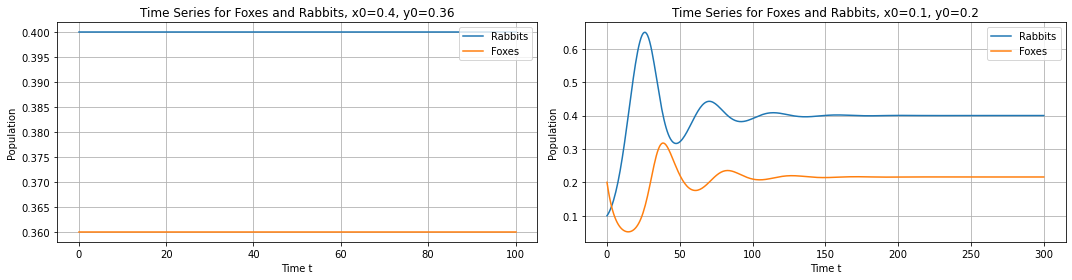

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

'''
EQUILIBRIUM
'''
# Declare the system parameters
a,b,c,d = 0.18,0.5,0.2,0.5# remember 0<a<= b; 0<c<=d

# Define the function that returns dx/dt and dy/dt together as dz/dt
def model(z,t):
    x,y = z
    dxdt = x*(a - b*y)   # Implementation of L-V equation
    dydt = y*(d*x - c)   # Implementation of L-V equation
    dzdt = [dxdt,dydt]
    return dzdt
    
x0,y0 = 0.4,0.36
z0 = [x0,y0]   
t = np.linspace(0,100,400)   # Time mesh
zns = odeint(model,z0,t)     # Call the odeint function; pass in model, z0 or [x0,y0] and t mesh
                             # odeint() will return the computed solutions at the requested time values,
                             # i.e. a set of x(t) values and a set of y(t) values (solutions) 
# Set figure size
plt.figure(1,(15,4))

# Plot time series for foxes and rabbits
plt.subplot(1,2,1)
plt.title("Time Series for Foxes and Rabbits, x0=0.4, y0=0.36")
plt.plot(t,zns[:,0],"-",label = "Rabbits")
plt.plot(t,zns[:,1],"-",label = "Foxes")
plt.ylabel("Population"); plt.xlabel("Time t")
plt.grid(True); plt.legend(loc=1)

'''
CYCLIC
'''
a,b,c,d = 0.18,0.5,0.2,0.5   # Try [0.3,0.0,0.2,0.0], [0.18,.0.5,0.2,0.5]

# Define the function that returns dx/dt and dy/dt together as dz/dt
def model(z,t):
    x,y = z[0],z[1]
    dxdt = x*(a*(1-x) - b*y)   # Implementation of L-V equation
    dydt = y*(d*x - c)   # Implementation of L-V equation
    dzdt = [dxdt,dydt]
    return dzdt
    #return [z[0]*(a - b*z[1]), z[1]*(d*z[0] - c)]
    
x0,y0 = 0.1,0.2
z0 = [x0,y0]   
t = np.linspace(0,300,400)   # Time mesh
zns = odeint(model,z0,t)     # Call the odeint function; pass in model, z0 or [x0,y0] and t mesh
                             # odeint() will return the computed solutions at the requested time values,
                             # i.e. a set of x(t) values and a set of y(t) values (solutions) 

plt.subplot(1,2,2)
plt.title("Time Series for Foxes and Rabbits, x0=0.1, y0=0.2")
plt.plot(t,zns[:,0],"-",label = "Rabbits")
plt.plot(t,zns[:,1],"-",label = "Foxes")
plt.ylabel("Population"); plt.xlabel("Time t")
plt.grid(True); plt.legend()

plt.tight_layout()
plt.show()



### Part B
Supposing the fox now has an unlimited supply of food sources just like the rabbits. The form of the differential equation for the rabbit remains the same while for the fox it now becomes
$$\frac{dy}{dt} = y\,(d\,x-c)+0.1$$

Setting an initial condition of $x = 0.2$ and $y = 0.2$ and $a,b,c,d = 0.1,0.5,0.2,0.5$, respectively, write a program that will display two side by side plots of both the rabbit and fox populations as follows:
- Left plot: time series plot 
- Right plot: phase portrait plot

Using a markdown cell, interpret the visuals obtained and answer the following question:
- Does the prey population always have to end up in the same state as what you have obtained in the result here? What system parameter(s) could possibly be adjusted to demonstrate otherwise? Support your answer with an appropriate visual in a code cell.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


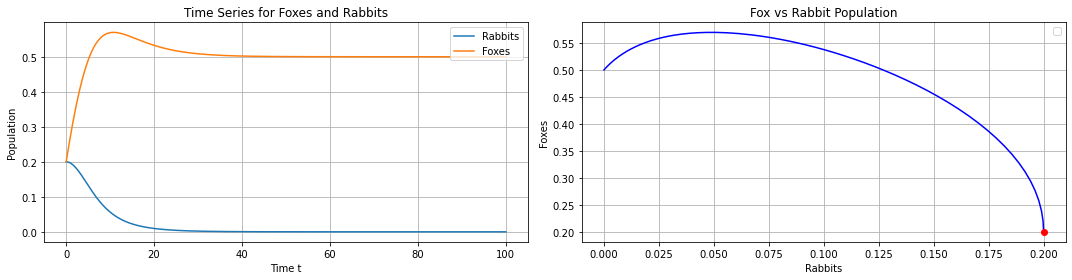

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Declare the system parameters
a,b,c,d = 0.1,0.5,0.2,0.5

# Define the function that returns dx/dt and dy/dt together as dz/dt
def model(z,t):
    x,y = z
    dxdt = x*(a - b*y)   # Implementation of L-V equation
    # dydt = y*(d*x - c)   # Implementation of L-V equation
    dydt = y*(d*x - c) + 0.1   # Implementation of L-V equation
    dzdt = [dxdt,dydt]
    return dzdt
    
x0,y0 = 0.2, 0.2
z0 = [x0,y0]   
t = np.linspace(0,100,400)   # Time mesh
zns = odeint(model,z0,t)     # Call the odeint function; pass in model, z0 or [x0,y0] and t mesh
                             # odeint() will return the computed solutions at the requested time values,
                             # i.e. a set of x(t) values and a set of y(t) values (solutions) 
# Set figure size
plt.figure(1,(15,4))

# Plot time series for foxes and rabbits
plt.subplot(1,2,1)
plt.title("Time Series for Foxes and Rabbits")
plt.plot(t,zns[:,0],"-",label = "Rabbits")
plt.plot(t,zns[:,1],"-",label = "Foxes")
plt.ylabel("Population"); plt.xlabel("Time t")
plt.grid(True); plt.legend(loc=1)

# Plot phase portrait (y(t) vs x(t))
plt.subplot(1,2,2)
plt.title("Fox vs Rabbit Population")
plt.plot(zns[:,0],zns[:,1],"b-")
plt.plot(z0[0],z0[1],'ro')   # Indicates initial starting point or initial populations
plt.ylabel("Foxes"); plt.xlabel("Rabbits")
plt.grid(True)

plt.grid(True); plt.legend()

plt.tight_layout()
plt.show()

Q: Does the prey population always have to end up in the same state as what you have obtained in the result here? What system parameter(s) could possibly be adjusted to demonstrate otherwise? Support your answer with an appropriate visual in a code cell.

No. a,b,c,d could possibly be adjusted. This will be demonstrated in the cell below.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


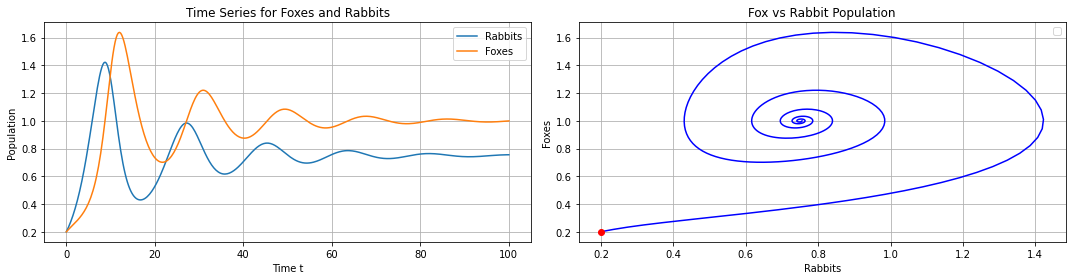

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


a,b,c,d = 0.4,0.4,0.4,0.4 # <<<<<<<<<<<<<<<<<<<<<< Changed a,b,c,d

# Define the function that returns dx/dt and dy/dt together as dz/dt
def model(z,t):
    x,y = z
    dxdt = x*(a - b*y)   # Implementation of L-V equation
    # dydt = y*(d*x - c)   # Implementation of L-V equation
    dydt = y*(d*x - c) + 0.1   # Implementation of L-V equation
    dzdt = [dxdt,dydt]
    return dzdt
    
x0,y0 = 0.2, 0.2
z0 = [x0,y0]   
t = np.linspace(0,100,400)   # Time mesh
zns = odeint(model,z0,t)     # Call the odeint function; pass in model, z0 or [x0,y0] and t mesh
                             # odeint() will return the computed solutions at the requested time values,
                             # i.e. a set of x(t) values and a set of y(t) values (solutions) 
# Set figure size
plt.figure(1,(15,4))

# Plot time series for foxes and rabbits
plt.subplot(1,2,1)
plt.title("Time Series for Foxes and Rabbits")
plt.plot(t,zns[:,0],"-",label = "Rabbits")
plt.plot(t,zns[:,1],"-",label = "Foxes")
plt.ylabel("Population"); plt.xlabel("Time t")
plt.grid(True); plt.legend(loc=1)

# Plot phase portrait (y(t) vs x(t))
plt.subplot(1,2,2)
plt.title("Fox vs Rabbit Population")
plt.plot(zns[:,0],zns[:,1],"b-")
plt.plot(z0[0],z0[1],'ro')   # Indicates initial starting point or initial populations
plt.ylabel("Foxes"); plt.xlabel("Rabbits")
plt.grid(True); plt.legend()

plt.tight_layout()
plt.show()

## <span style = "color:blue">Question 2 (10 marks)</span>

Given the latest Covid-19 csv data file (**Covid19.csv**), perform the following:

### Part A
Plot a visualisation of the Singapore (iso_code: 'SGP') Covid data daily new cases (smoothed; 7th column) since the onset of Covid-19 (date >= '2020-01-31')

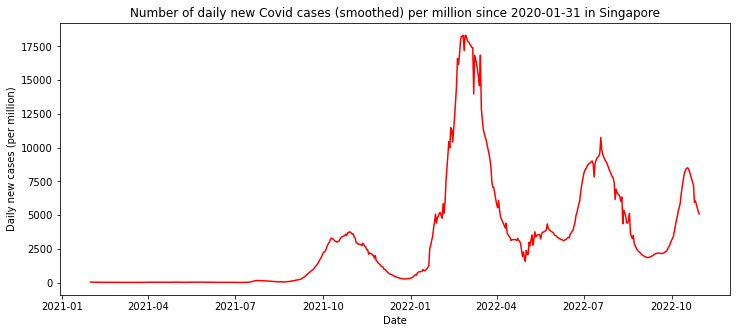

In [6]:
# Visualisation of SG Covid data during the first wave of Omicron virus spread

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('Covid19.csv')   # Return a dataframe from the csv file
df['date'] = pd.to_datetime(df['date'])  # Convert the 'Date' column data in dataframe 
                                         # into a Python date time object 
                                         # so that date labels will appear properly in plot
dfSG = df[(df['iso_code'] == 'SGP') & (df['date']>='2021-01-31')]  
SG = pd.DataFrame(dfSG).to_numpy()   # Prepare for numeric plotting

# Plot Singapore's COVID data
plt.figure(figsize=(12,5))
#plt.plot(SG[:,3],SG[:,5],"r")   # 4th field is date; 6th field is daily new cases
plt.plot(SG[:,3],SG[:,6],"r")   # 4th field is date; 7th field is daily new cases (smoothed)
plt.title("Number of daily new Covid cases (smoothed) per million since 2020-01-31 in Singapore")
plt.ylabel("Daily new cases (per million)"); plt.xlabel("Date")
plt.show()




### Part B
Considering the period from the onset of the **latest** infection wave driven mainly by the XBB Omicron sub-variant (date >= '2022-09-01) in Singapore, write a program to:

- find the maximum caseload and the date of its occurence (use non-smoothed data: 6th column); 
- estimate the number of days for the infection wave to peak (**Hint**: Consider the difference between the indices corresponding to the maximum and minimum caseloads using the non-smoothed data: 6th column. The function `np.argmin()` could be used to return the index corresponding to the minimum value in an array of data.)

In [7]:
# Visualisation of SG Covid data during the first wave of Omicron virus spread

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('Covid19.csv')   # Return a dataframe from the csv file
df['date'] = pd.to_datetime(df['date'])  # Convert the 'Date' column data in dataframe 
                                         # into a Python date time object 
                                         # so that date labels will appear properly in plot
dfSG = df[(df['iso_code'] == 'SGP') & (df['date']>'2022-09-01')]  
# display(dfSG)   # For a nicer display of data records
SG = pd.DataFrame(dfSG).to_numpy()   # Prepare for numeric plotting

maxCase = np.max(SG[:,5])    # Retrieve max infected population
max_index = np.argmax(SG[:,5])   # Retrieve row index that corresponds to where maxCase is
max_date = SG[max_index,3]           # Retrieve date that corresponds to maxCase
print(f"Highest caseload of {maxCase:.0f} (per million) occurs on {max_date.date()}")  

min_case = np.max(SG[:,5])    # Retrieve max infected population
min_index = np.argmin(SG[:,5])   # Retrieve row index that corresponds to where maxCase is
min_date = SG[min_index,3]           # Retrieve date that corresponds to maxCase
days_difference = max_date - min_date
print(f"Estimated number of days for the infection wave to peak: {str(days_difference)[:7]}")


Highest caseload of 11934 (per million) occurs on 2022-10-18
Estimated number of days for the infection wave to peak: 43 days


### Part C
Supposing the average number of days to recover (becoming non-infectious) from the latest infection wave in Singapore is 7 days for an infected individual. Using the SIR modeling for disease spread and setting the initial infected fractional population to be 0.001, find an estimate for R0 that will result in the same (or close to) number of days for the infection wave to peak from the onset of the simulation as Part B. Plot the simulation and indicate where max $I$ occurs with a vertical line plot. (**Hint**: Choose an appropriate `tmax` value and also consider a `t` space with an interval of 1 day).

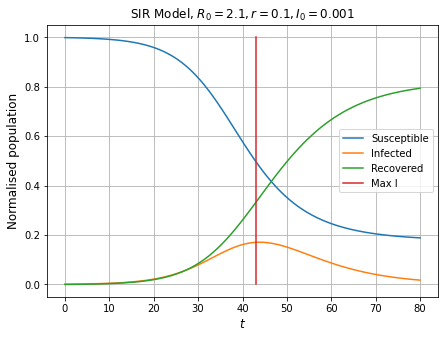

In [27]:
# Modeling SIR with R0 = 0.9

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the model function 
def model(U, t):
    s, i = U[0], U[1]
    dSdt = -r*R0*s*i
    dIdt = r*i*(R0*s-1)
    return [dSdt, dIdt]
    # return [ -r*R0*U[0]*U[1], r*U[1]*(R0*U[0]-1) ]   # One line of code to return [dSdt, dIdt]

tmax = 80
ticks = tmax   # Further division of t interval
t = np.linspace(0, tmax, ticks)

r = 1/7     # Rate of recovery 
R0 = 2.1   # Basic reproductive ratio
U0 = [0.999, 0.001]   # Initial conditions; choose a very small infected fraction

Uns = odeint(model, U0, t)

S = Uns[:,0]   # Extract the first column of data from Uns which contains the solutions for S
I = Uns[:,1]   # Extract the second column of data from Uns which contains the solutions for I
R = 1-S-I      # Remember S + I + R = 1
    
plt.figure(figsize=(7,5))
plt.plot(t,S,label='Susceptible')
plt.plot(t,I,label='Infected')
plt.plot(t,R,label='Recovered')
plt.plot([43 for _ in t],np.linspace(0, 1, len(t)), label="Max I")
plt.title(f"SIR Model, $R_0 = {R0}, r = {r:.1f}, I_0 = {U0[1]}$")
plt.xlabel("$t$", fontsize=12)
plt.ylabel("Normalised population", fontsize=12) 
plt.legend()
plt.grid()
plt.show()

# R0 is around 2.1


## <span style = "color:blue">Question 3 (10 marks)</span>
Write a program to simulate a 2D random walk as follows:
- You are to prompt for the number of steps to simulate walk. 
- There are only two directions for each step: along the x or along the y direction. The direction should be randomly decided. 
- The number of steps along the x or y direction is then randomly decided by the rolling of an unbiased six-sided dice (with face value of 1,2,3,4,5,6) as follows:
    - If an odd face value is obtained, the walk will advance in the positive direction (positive x or positive y) with the number of steps taken to be the same as the face value of the dice obtained.
    - Else for an even face value obtained, the walk will advance in the negative direction (negative x or negative y) with the number of steps again taken to be the same as the face value of the dice obtained.

Assuming the starting position is (0,0), display the walk visually and output the final position (x,y) of the walk.

Number of steps: 1000


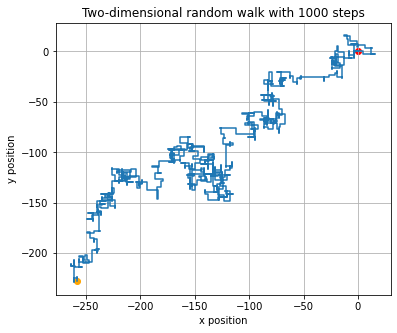

In [33]:
# 2D random walk

import numpy.random as r 
import numpy as np 
import matplotlib.pyplot as plt

n = int(input("Number of steps: "))   # Number of steps
# n = 1000

x = np.zeros(n+1,int)   # x and y are arrays which store the coordinates of the position 
y = np.zeros(n+1,int) 
dice_number = [i for i in range(1,7)]

for i in range(1,n+1):

    rolled = r.choice(dice_number) 

    if r.random() <= 0.5:
        if rolled % 2: #odd means positive
            x[i] = x[i - 1] + rolled   # Update direction along x
            y[i] = y[i - 1]       # Update direction along y
        else:
            x[i] = x[i - 1] - rolled   # Update direction along x
            y[i] = y[i - 1]       # Update direction along y
    else:
        if rolled % 2: #odd means positive
            x[i] = x[i - 1] 
            y[i] = y[i - 1] + rolled
        else:
            x[i] = x[i - 1] 
            y[i] = y[i - 1] - rolled


plt.figure(figsize=(6,5))
plt.plot(x,y)
plt.scatter(x[0],y[0], c='r', marker='o')   # Plot first point of simulation
plt.scatter(x[-1],y[-1], c='orange', marker='o')   # Plot last point of simulation
plt.title(f"Two-dimensional random walk with {n} steps")
plt.xlabel("x position")
plt.ylabel("y position")        
plt.grid()
plt.show()